In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [52]:
with open('../raw_data/data/depth_rgb_combined_files_7/combined_value_1.txt') as src_file:
    data_array = np.empty((303360, 4))
    for index, line in enumerate(src_file.readlines()):
        data_array[index] = [int(x) for x in line.split()]    

In [53]:
data_array = np.reshape(data_array, (480, 632, 4))
img_array = data_array[:, :, :3]
img_array = img_array.astype(np.uint8)
type(img_array[0, 0][0])

numpy.uint8

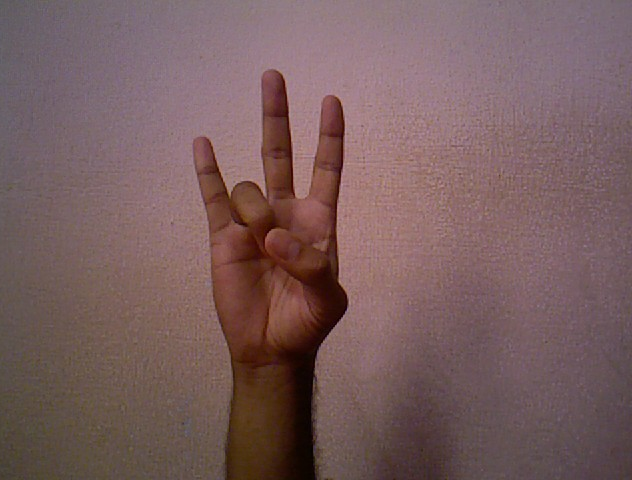

In [54]:
#data_array = np.reshape(data_array, (480, 632))
bgImg = Image.fromarray(img_array)
bgImg

In [4]:
def get_data_array(src_path, current_file):
    img = Image.open(src_path + current_file + ".jpg")
    return np.asarray(img)

In [5]:
# rgb
def trim_left(data_array):
    data_array = np.delete(data_array, [0, 1, 2, 3, 4, 5, 6, 7], axis=1)
    return data_array

In [6]:
# depth 
def trim_right(data_array):
    data_array = np.delete(data_array, [632, 633, 634, 635, 636, 637, 638, 639], axis=1)
    return data_array

In [9]:
current_file_index = 1
img_src_path = "../raw_data/data/rgb_" + str(current_file_index)
depth_src_path = "../raw_data/data/depth_to_img_files_" + str(current_file_index)
current_file = str(1)
img_data_array = get_data_array(img_src_path, "/rgb_image_" + current_file)
depth_data_array = get_data_array(depth_src_path, "/img_from_depth_" + current_file)


In [19]:
for iter_var in range(10):
    current_file_index = str(iter_var)
    dest_path = "../raw_data/data/depth_rgb_combined_files_" + str(current_file_index)
        if (os.path.exists(dest_path)) != True:
            os.mkdir(dest_path)
    for i in range(16):
        current_file = str(i)
    

In [ ]:
def combine_both(img_data_array, depth_data_array):
    

In [ ]:
for iter_var in range(10):
    current_file_index = str(iter_var)
    img_src_path = "../raw_data/data/rgb_" + str(current_file_index)
    depth_src_path = "../raw_data/data/depth_to_img_files_" + str(current_file_index)
    dest_path = "../raw_data/data/depth_rgb_combined_files_" + str(current_file_index)
    if (os.path.exists(dest_path)) != True:
        os.mkdir(dest_path)
    for i in range(16):
        current_file = str(i)
        img_data_array = get_data_array(img_src_path, "/rgb_image_" + current_file)
        depth_data_array = get_data_array(depth_src_path, "/img_from_depth_" + current_file)
        final_data_array = combine_both(img_data_array, depth_data_array)
        
        with open(dest_path + "/combined_value_" + current_depth_file + ".txt", "w") as dest_file:
            for idx in range(302080):
                temp_depth_value = final_data_array[idx]
                dest_file.write(str(temp_depth_value) + "\n")